# COMP 494 Final Project
Author: Brady Fischer and Nathan Van Kempen
### Housing sale prices
Github link: https://github.com/usd-cs/494-FinalProj.git

### Data Importing and Processing

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew, probplot
pd.set_option('display.max_columns', None)

In [18]:
#import dataset
og_df = pd.read_csv('house_sales.csv')

In [19]:
#get dimensions
og_df.shape

(21613, 21)

In [20]:
#number of categorical variables
categoricals = 0
for datatype in og_df.dtypes:
    if datatype == 'object':
     categoricals = categoricals + 1
print("# of categorical variables: ", categoricals)
print("# of continuous variables: ", og_df.shape[1] - categoricals -1)

# of categorical variables:  1
# of continuous variables:  19


In [21]:
og_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
#get column names
og_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Handling Missing Data

In [23]:
#which columns have null values and how many
total = og_df.isnull().sum().sort_values(ascending=False)
percent = (og_df.isnull().sum()/og_df.isnull().count()).sort_values()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bedrooms,1134,0.052468
sqft_living,1110,0.051358
bathrooms,1068,0.049415
sqft_lot,1044,0.048304
id,0,0.000000
sqft_basement,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000


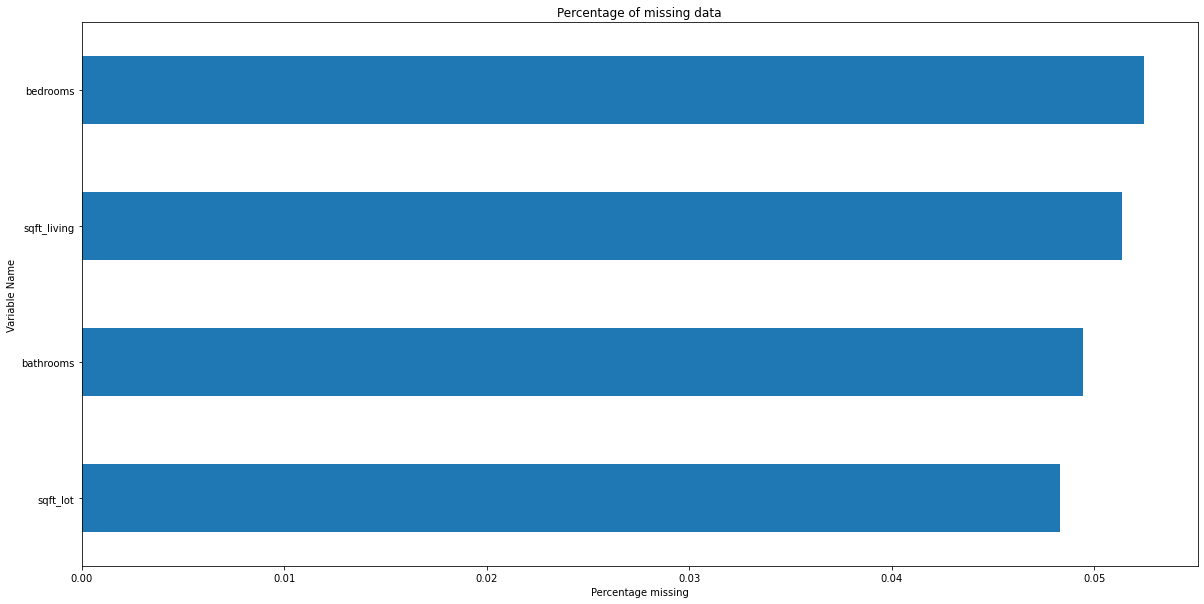

In [24]:
#plot [ercentage of missing data
missing_data['Percent'].head(4).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Percentage missing")
plt.ylabel("Variable Name")
plt.title("Percentage of missing data")
plt.show()

In [25]:
#impute missing data since they are continuous
og_df['bedrooms'] = og_df.groupby('zipcode')['bedrooms'].transform(lambda x: x.fillna(x.median()))
og_df.loc[og_df['sqft_living'].isnull(), 'sqft_living'] = og_df['sqft_above'] + og_df['sqft_basement']
og_df['bathrooms'] = og_df.groupby('zipcode')['bathrooms'].transform(lambda x: x.fillna(x.median()))
og_df['sqft_lot'] = og_df.groupby('zipcode')['sqft_lot'].transform(lambda x: x.fillna(x.mean()))

We imputed bedrooms and bathrooms with the median value to keep them at whole or half values. We imputed sqft_living by adding sqft_above and sqft_basement together as that is how all the other values in the column were derived. We imputed sqft_lot as mean. We grouped these by zipcode to try and group similar houses together

In [26]:
#make sure no more missing values
total = og_df.isnull().sum().sort_values(ascending=False)
percent = (og_df.isnull().sum()/og_df.isnull().count()).sort_values()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
id,0,0.0
grade,0,0.0
sqft_living15,0,0.0
long,0,0.0
lat,0,0.0
zipcode,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0


### Handling Outliers

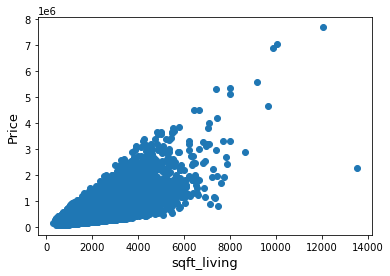

In [27]:
#find outliers
fig, ax = plt.subplots()
ax.scatter(x = og_df['sqft_living'], y = og_df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()

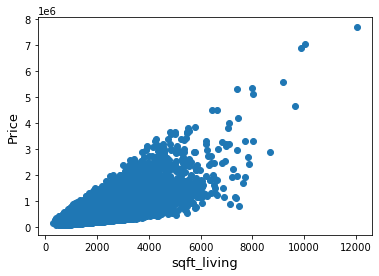

In [28]:
#remove outliers
og_df = og_df.drop(og_df[(og_df['sqft_living']>10000) & (og_df['price']<3000000)].index)
#view updated plot
fig, ax = plt.subplots()
ax.scatter(x = og_df['sqft_living'], y = og_df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()

### Normalize Target Variable

C:\Users\Brady\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540007.64 and sigma = 366936.37



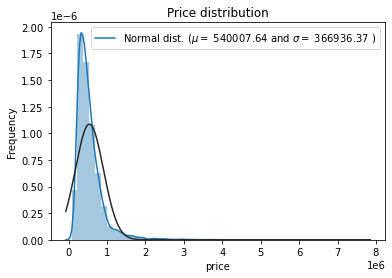

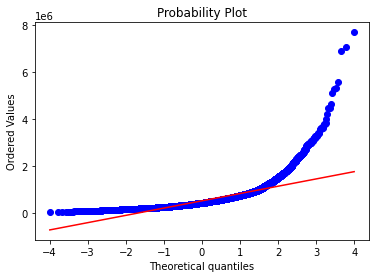

In [29]:
#Normalizing the target variable
sns.distplot(og_df['price'] , fit=norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(og_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(og_df['price'], plot=plt)
plt.show()

C:\Users\Brady\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 13.05 and sigma = 0.53



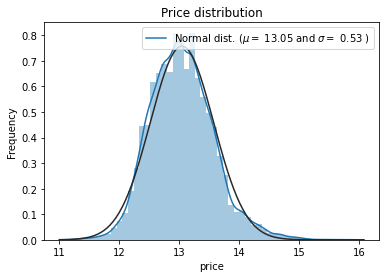

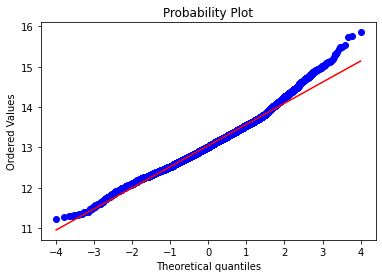

In [30]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
og_df["price"] = np.log1p(og_df["price"])

#Check the new distribution 
sns.distplot(og_df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(og_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(og_df['price'], plot=plt)
plt.show()

### Data Analysis and Visualization

In [31]:
from sklearn.preprocessing import LabelEncoder

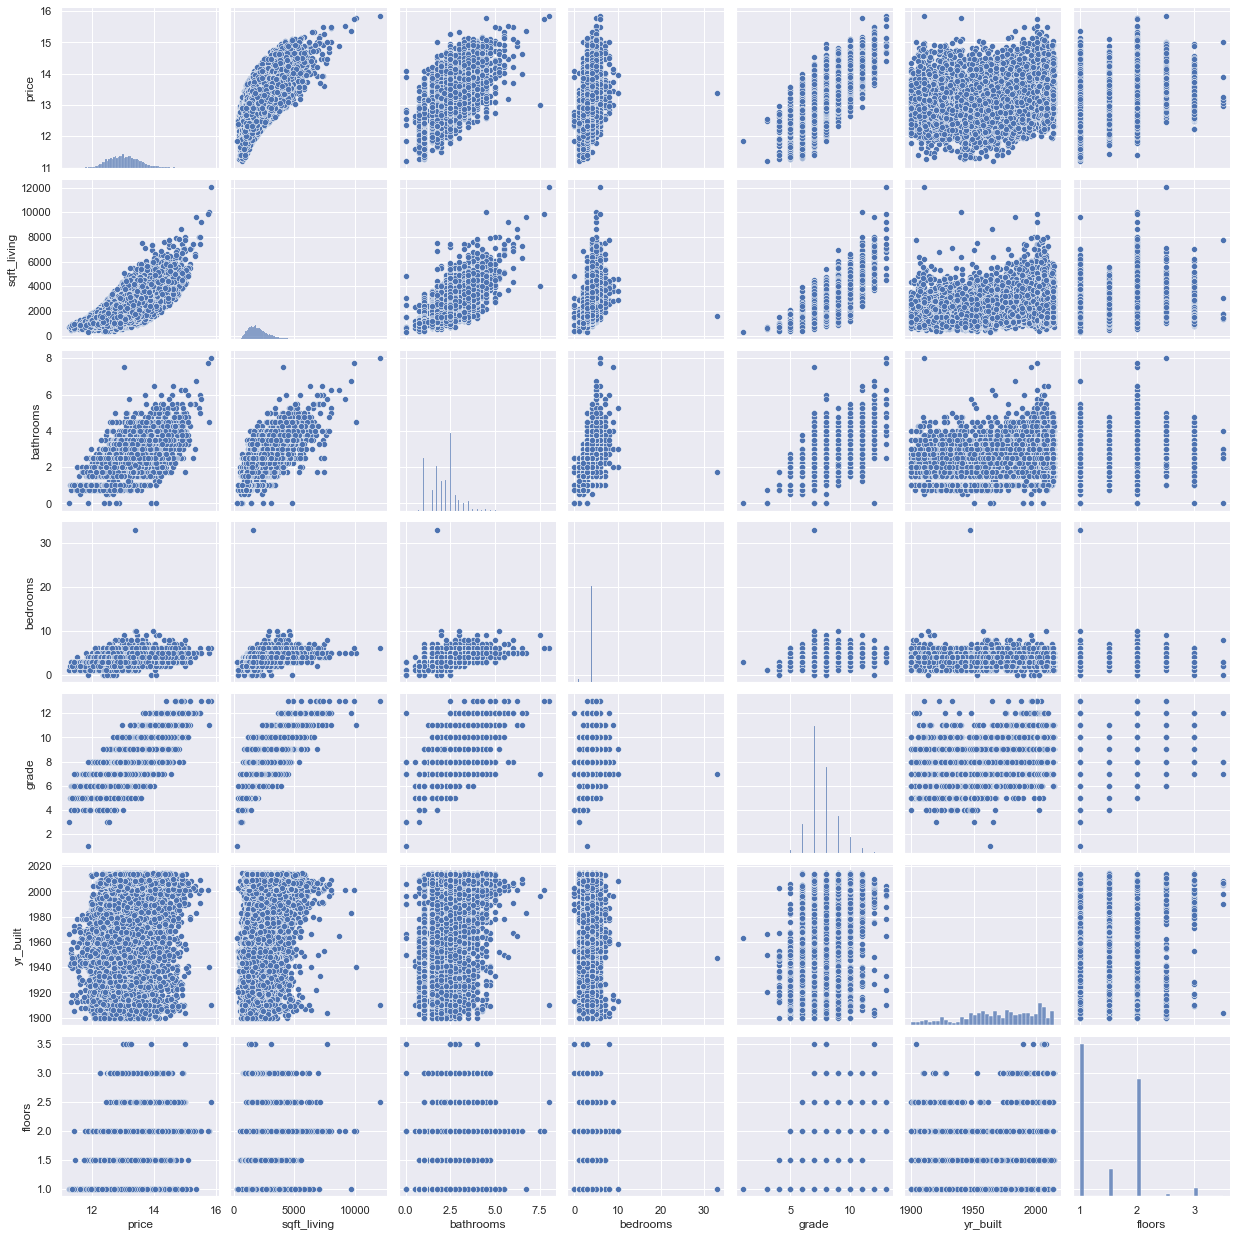

In [32]:
#pairplot showing relation between variables
sns.set()
cols = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'floors']
sns.pairplot(og_df[cols], height=2.5)
plt.show()

<AxesSubplot:>

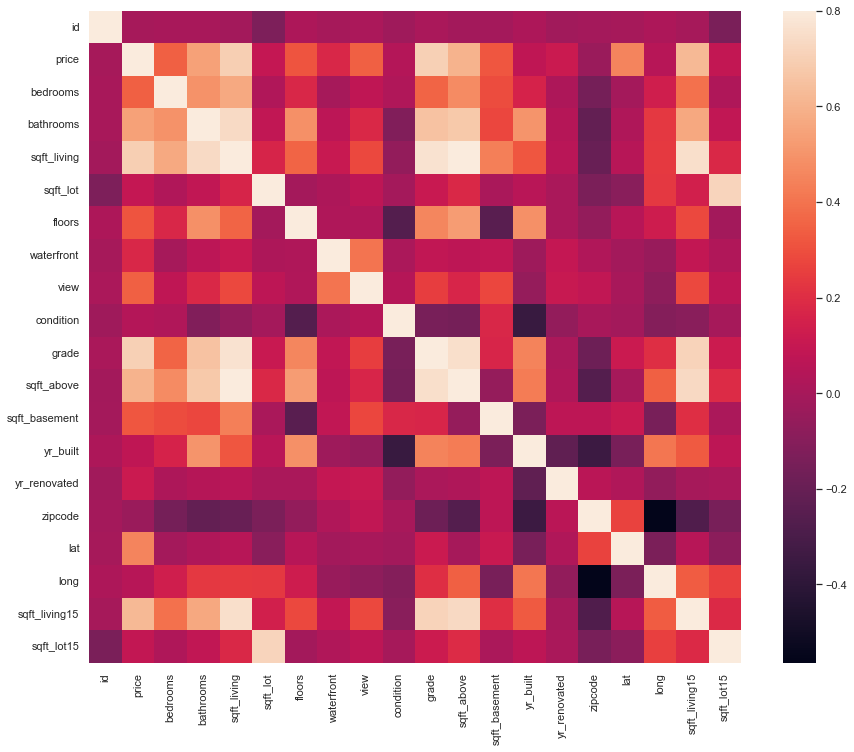

In [33]:
 #Correlation matrix to see how features are correlated with price
corrmat = og_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

In [34]:
#Turn these columns into categorical variables
og_df['waterfront'] =  og_df['waterfront'].astype(str)
og_df['view'] =  og_df['view'].astype(str)
og_df['condition'] =  og_df['condition'].astype(str)
og_df['grade'] =  og_df['grade'].astype(str)
og_df['yr_renovated'] = og_df['yr_renovated'].astype(str)

We turned these variables into categorical because they were either ordinal values or boolean.

In [35]:
#Label encode categorical variables
cols = ('waterfront', 'view', 'condition', 'grade', 'date', 'yr_renovated')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(og_df[c].values))
    og_df[c] = lbl.transform(list(og_df[c].values))

print("Shape of dataframe: {}".format(og_df.shape))

Shape of dataframe: (21612, 21)


In [36]:
#Get the skew of numeric features
numeric_feats = og_df.dtypes[og_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = og_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
sqft_lot,13.092198
waterfront,11.384048
sqft_lot15,9.524564
yr_renovated,5.042111
view,3.396317
bedrooms,2.064413
sqft_basement,1.556953
sqft_above,1.420069
sqft_living,1.398332
sqft_living15,1.106624


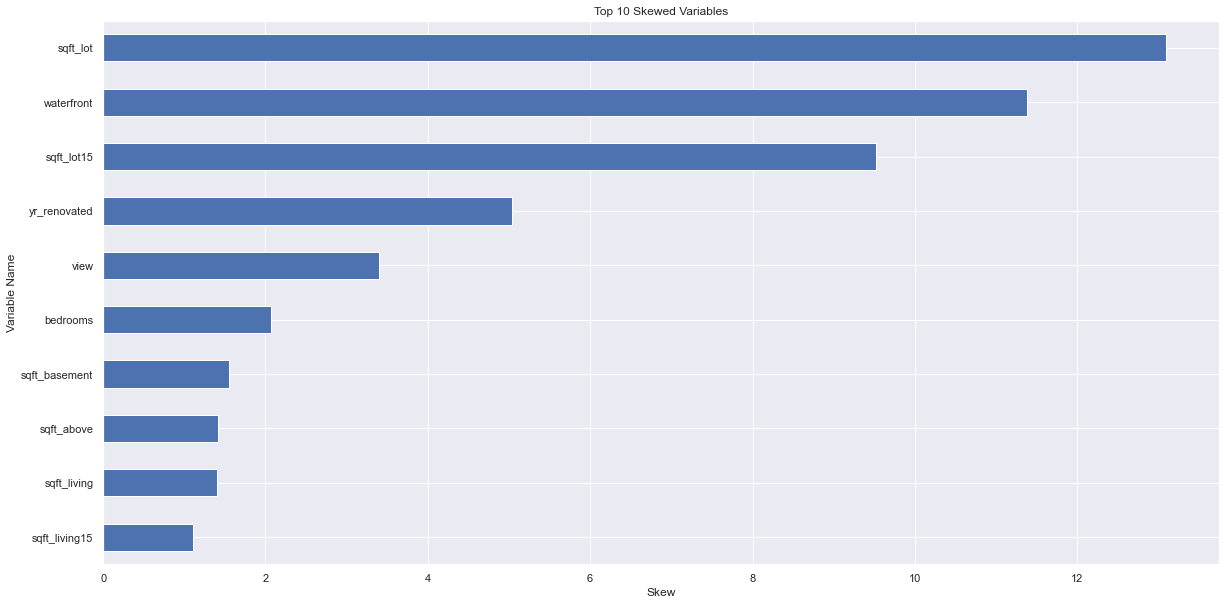

In [37]:
#plot the top 10 skewed variables
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis()
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

### Data Analytics

In [38]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

In [39]:
train_df = og_df[og_df.columns.difference(['id', 'price'])]

In [40]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train_df, og_df.price, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [41]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [42]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [43]:
rf = RandomForestRegressor(n_estimators=100)

In [44]:
dt = DecisionTreeRegressor(max_depth = 10)

In [45]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [46]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

#### Algorithm Results on 5 Fold Cross Validation

In [47]:
score_linear = rmse_cv(lr_w_int,n_folds)
print("Linear Regression (w/ Intercept) score: {:.4f} ({:.4f})\n".format(score_linear.mean(), score_linear.std()))

Linear Regression (w/ Intercept) score: 0.2722 (0.0035)



In [48]:
score_linear_no_int = rmse_cv(lr_no_int,n_folds)
print("Linear Regression (No Intercept) score: {:.4f} ({:.4f})\n".format(score_linear_no_int.mean(), score_linear_no_int.std()))

Linear Regression (No Intercept) score: 0.2725 (0.0038)



In [49]:
score_neigh = rmse_cv(neigh,n_folds)
print("Nearest Neighbor (13) score: {:.4f} ({:.4f})\n".format(score_neigh.mean(), score_neigh.std()))

Nearest Neighbor (13) score: 0.3639 (0.0065)



In [50]:
score_dt = rmse_cv(dt,n_folds)
print("Decision Tree Regression score: {:.4f} ({:.4f})\n".format(score_dt.mean(), score_dt.std()))

Decision Tree Regression score: 0.2226 (0.0040)



In [51]:
score_rf = rmse_cv(rf,n_folds)
print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_rf.std()))

Random Forest Regression score: 0.1751 (0.0039)



In [52]:
score_xg = rmse_cv(model_xgb,n_folds)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score_xg.mean(), score_xg.std()))

Xgboost score: 0.1690 (0.0049)



In [53]:
score_lgbm = rmse_cv(model_lgb,n_folds)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score_lgbm.mean(), score_lgbm.std()))

LGBM score: 0.1678 (0.0041)



In [54]:
#plot RMSE and STD for each Algorithm
data = {'Linear (No Intercept)':[score_linear_no_int.mean(),score_linear_no_int.std()], 'XGBoost':[score_xg.mean(),score_xg.std()], 'Random Forest': [score_rf.mean(),score_rf.std()]
        , 'LightGBM': [score_lgbm.mean(),score_lgbm.std()], 'Decision Tree': [score_dt.mean(),score_dt.std()],'Nearest Neighbor': [score_neigh.mean(),score_neigh.std()]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm','RMSE','STD']

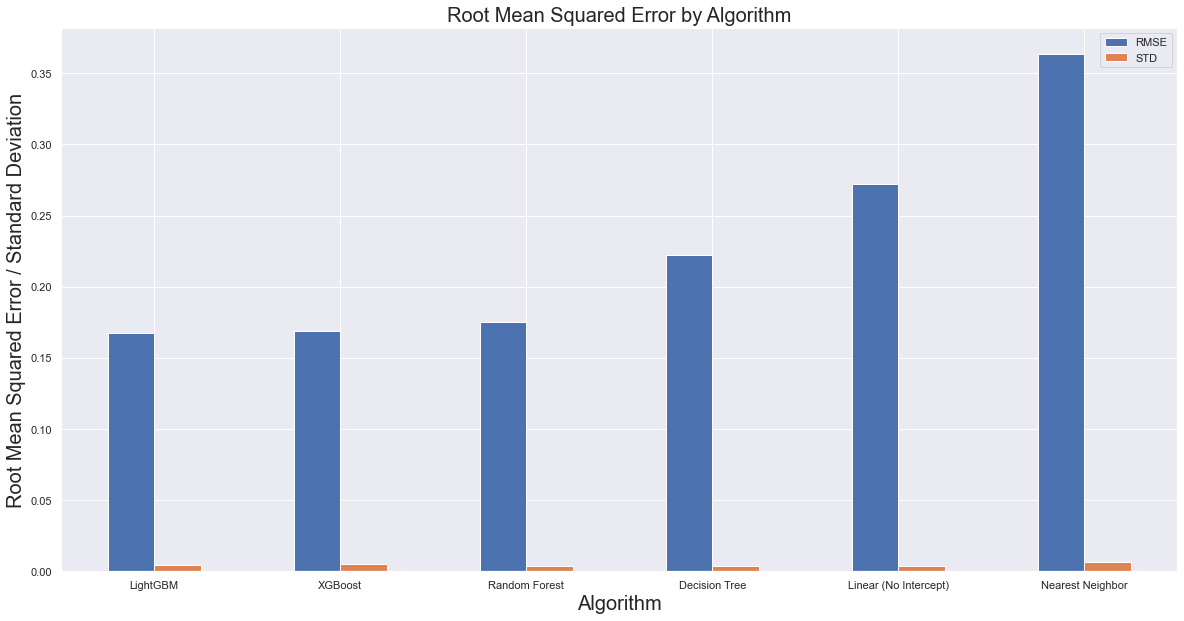

In [55]:
data_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error by Algorithm",fontsize=20)
plt.show()

#### Feature Importance Chart for LGB Model

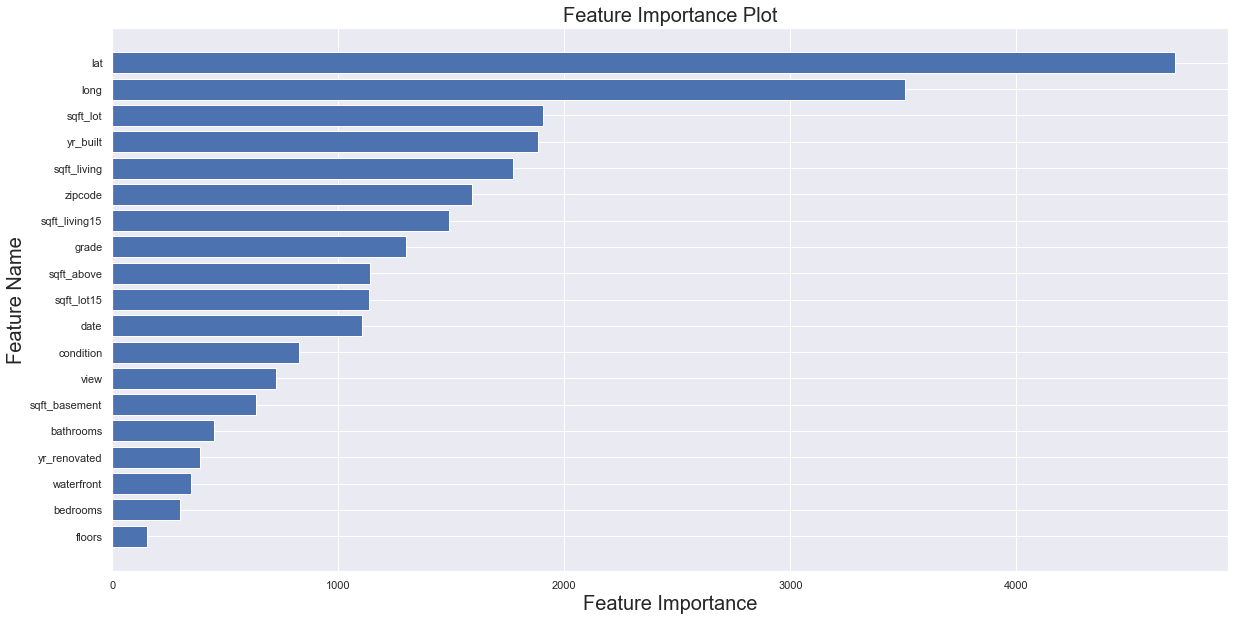

In [60]:
model = model_lgb.fit(train_df, og_df.price)
feature_importances = model.feature_importances_
feature_names = train_df.columns
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_imp_df = feature_imp_df.sort_values('Importance', ascending = False)
top_features = feature_imp_df[:20]
plt.figure(figsize=(20, 10))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature Name', fontsize=20)
plt.title('Feature Importance Plot', fontsize=20)
plt.show()

####  Feature Importance Chart for XGB Model

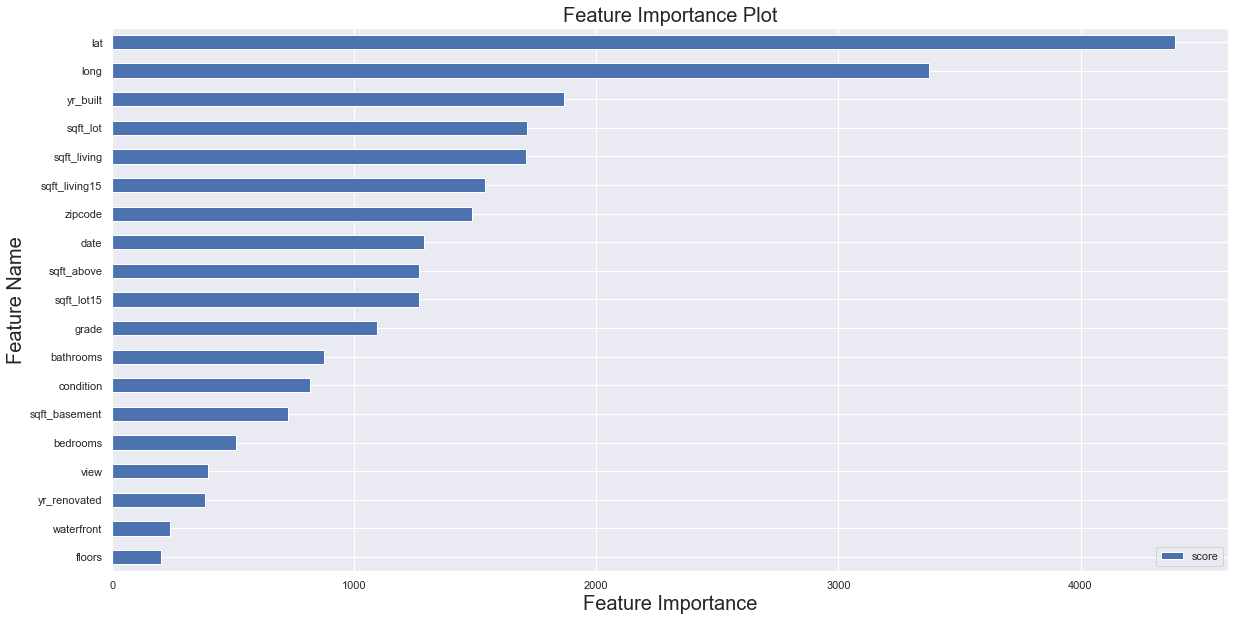

In [58]:
model = model_xgb.fit(train_df, og_df.price) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:20].plot(kind='barh', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Feature Importance Plot",fontsize=20)
plt.show()